In [11]:
!wget --no-check-certificate \
    https://storage.googleapis.com/laurencemoroney-blog.appspot.com/rps.zip \
    -O /tmp/rps.zip
!wget --no-check-certificate \
    https://storage.googleapis.com/laurencemoroney-blog.appspot.com/rps-test-set.zip \
    -O /tmp/rps-test-set.zip

--2020-09-23 10:54:42--  https://storage.googleapis.com/laurencemoroney-blog.appspot.com/rps.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 64.233.166.128, 74.125.71.128, 74.125.133.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|64.233.166.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 200682221 (191M) [application/zip]
Saving to: ‘/tmp/rps.zip’

/tmp/rps.zip        100%[===================>] 191.38M  69.9MB/s    in 2.7s    

2020-09-23 10:54:45 (69.9 MB/s) - ‘/tmp/rps.zip’ saved [200682221/200682221]

--2020-09-23 10:54:45--  https://storage.googleapis.com/laurencemoroney-blog.appspot.com/rps-test-set.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 74.125.71.128, 74.125.133.128, 108.177.15.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|74.125.71.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 29516758 (28M) [application/zip]
Saving to: ‘/tmp/r

In [12]:
import os
import zipfile

Localzip = '/tmp/rps.zip'
Zipref = zipfile.ZipFile(Localzip,'r')
Zipref.extractall('/tmp/')
Zipref.close()
 
Localzip = '/tmp/rps-test-set.zip'
Zipref = zipfile.ZipFile(Localzip,'r')
Zipref.extractall('/tmp/')
Zipref.close()

In [13]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import categorical_crossentropy
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [14]:
model = tf.keras.models.Sequential([tf.keras.layers.Conv2D(64, (5, 5), activation='relu', padding = 'valid', input_shape=(300, 300, 3)),
                                   tf.keras.layers.MaxPooling2D(2, 2),
                                   tf.keras.layers.Conv2D(64, (3, 3), activation='relu', padding = 'valid'),
                                   tf.keras.layers.MaxPooling2D(2, 2),
                                   tf.keras.layers.Conv2D(32, (3, 3), activation='relu', padding = 'valid', strides=(3,3)),
                                   tf.keras.layers.MaxPooling2D(2, 2),
                                   tf.keras.layers.Flatten(),
                                   tf.keras.layers.Dense(1024, activation=tf.nn.relu),
                                
                                   tf.keras.layers.Dense(256, activation=tf.nn.relu),
                                   tf.keras.layers.Dropout(0.5),
                                   tf.keras.layers.Dense(3, activation=tf.nn.softmax)])

In [15]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 296, 296, 64)      4864      
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 148, 148, 64)      0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 146, 146, 64)      36928     
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 73, 73, 64)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 24, 24, 32)        18464     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 12, 12, 32)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 4608)             

In [29]:
optimizer = tf.keras.optimizers.Adam(lr = 1e-5)
model.compile(optimizer = optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

In [30]:
train_dir = "/tmp/rps/"
validation_dir = "/tmp/rps-test-set/"

In [31]:
train_datagen = ImageDataGenerator(rescale = 1/255, rotation_range=20)
test_datagen = ImageDataGenerator(rescale = 1/255, rotation_range=20)
train_generator = train_datagen.flow_from_directory(train_dir, target_size = (300, 300), batch_size=128, shuffle=True, class_mode = 'categorical')
validation_generator = test_datagen.flow_from_directory(validation_dir, target_size = (300, 300), batch_size=128, shuffle=True, class_mode = 'categorical')

Found 2520 images belonging to 3 classes.
Found 372 images belonging to 3 classes.


In [32]:
history = model.fit_generator(train_generator, validation_data = validation_generator, epochs=30, verbose=1)

Epoch 1/30
20/20 [==============================] - 67s 3s/step - loss: 1.0961 - accuracy: 0.3583 - val_loss: 1.0963 - val_accuracy: 0.4194
Epoch 2/30
20/20 [==============================] - 67s 3s/step - loss: 1.0872 - accuracy: 0.4127 - val_loss: 1.0933 - val_accuracy: 0.4355
Epoch 3/30
20/20 [==============================] - 66s 3s/step - loss: 1.0779 - accuracy: 0.4631 - val_loss: 1.0878 - val_accuracy: 0.4570
Epoch 4/30
20/20 [==============================] - 66s 3s/step - loss: 1.0653 - accuracy: 0.5139 - val_loss: 1.0811 - val_accuracy: 0.4785
Epoch 5/30
20/20 [==============================] - 66s 3s/step - loss: 1.0469 - accuracy: 0.5496 - val_loss: 1.0727 - val_accuracy: 0.4973
Epoch 6/30
20/20 [==============================] - 66s 3s/step - loss: 1.0226 - accuracy: 0.5960 - val_loss: 1.0584 - val_accuracy: 0.5323
Epoch 7/30
20/20 [==============================] - 66s 3s/step - loss: 0.9953 - accuracy: 0.5913 - val_loss: 1.0405 - val_accuracy: 0.5134
Epoch 8/30
20/20 [==

In [34]:
print(history)
print(tf.__version__)

2.3.0


In [ ]:
import matplotlib.pyplot as plt
plt.semilogx(history.history['lr'], history.history['loss'])
plt.axis([1e-4, 1, 0, 30])

KeyError: ignored

In [39]:
model.save_weights('my_model_weights1.h5')
model.save('my_model1.h5')

In [35]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [36]:
from google.colab.patches import cv2_imshow

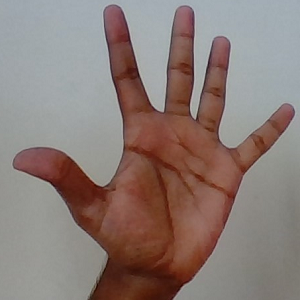

In [37]:
'''!curl -o logo.png https://drive.google.com/file/d/1jdXY0fZ_ZAltoB1eTYYoBsun9J1N3A58/view?usp=sharing'''
import cv2


img = cv2.imread('/content/drive/My Drive/WIN_20200626_10_46_32_Pro.png', cv2.IMREAD_UNCHANGED)
cv2_imshow(img)

In [ ]:
print(img.shape)

(300, 300, 4)


In [38]:
from keras.preprocessing import image

test_img = img
print(test_img.shape)
test_img = image.img_to_array(test_img[:,:,:3])
test_img = np.expand_dims(test_img, axis=0)
print(test_img.shape)
pred = model.predict(test_img)
print(pred)
max_index = np.argmax(pred[0])
gesture = ('paper', 'rock', 'scissors')
predicted_gesture = gesture[max_index]
print(predicted_gesture)

(300, 300, 4)
(1, 300, 300, 3)
[[1. 0. 0.]]
paper
